In [2]:
import numpy as np
import matplotlib.pyplot as plt

deg2rad = np.pi / 180.0
rad2deg = 180.0 / np.pi

R = 6.96e8
dt = 0.001
alpha = 6.048e13
dphi = 2*deg2rad
dtheta1_d = 2*3
dtheta2_d = 3
dtheta3_d = 2
tot_time = 365
N_steps = int(tot_time / dt)
save = 100
N_save = int(N_steps / save)+1
N_phi = int(2*np.pi/ dphi)
v_mer_max = 1.296e6
omega_max_deg = 13.38
omega_max = omega_max_deg*deg2rad

theta_1n = np.arange(5, 30, dtheta1_d)
theta_2n = np.arange(30, 60, dtheta2_d)
theta_3 = np.arange(60, 120, dtheta3_d)
theta_2s = np.arange(120, 150, dtheta2_d)
theta_1s = np.arange(150, 180 - 5, dtheta1_d)

print("theta_1n:", theta_1n.shape)
print("theta_2n:", theta_2n.shape)  
print("theta_3:", theta_3.shape)
print("theta_2s:", theta_2s.shape)
print("theta_1s:", theta_1s.shape)

N_theta = (len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s) + len(theta_1s))
theta_deg = np.concatenate((theta_1n, theta_2n, theta_3, theta_2s, theta_1s))

theta = theta_deg * deg2rad
dtheta1 = dtheta1_d * deg2rad
dtheta2 = dtheta2_d * deg2rad
dtheta3 = dtheta3_d * deg2rad

delta_x = R*np.min(np.sin(theta))*dphi
delta_y = R*dtheta3

stab_par = min((min(delta_x**2,delta_y**2))/(4*alpha), delta_y/v_mer_max, dphi/omega_max)
print(f"stab_par: {stab_par}")
assert dt <= stab_par, "Stability condition violated!!!!!!!!!!!"

phi = np.arange(0, 2 * np.pi, dphi)
Phi, Theta = np.meshgrid(phi, theta)

Phi_deg = Phi * rad2deg
Theta_deg = Theta * rad2deg

theta_1n: (5,)
theta_2n: (10,)
theta_3: (30,)
theta_2s: (10,)
theta_1s: (5,)
stab_par: 0.01853332956548756


In [3]:
(4*deg2rad)**2

0.004873878716587337

In [4]:
np.min(np.sin(theta))

np.float64(0.08715574274765817)

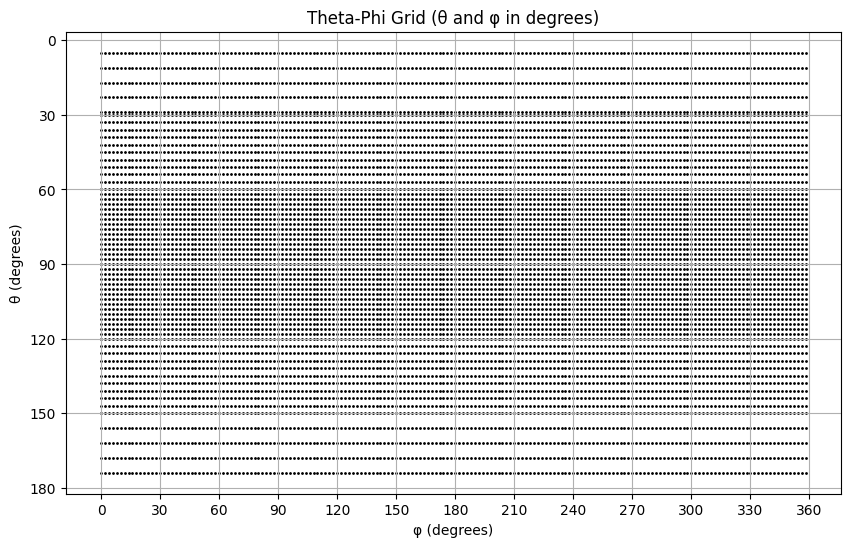

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(Phi_deg, Theta_deg, s=1, color='black')
plt.xlabel("φ (degrees)")
plt.ylabel("θ (degrees)")
plt.gca().invert_yaxis()
plt.title("Theta-Phi Grid (θ and φ in degrees)")
plt.xticks(np.arange(0, 361, 30))
plt.yticks(np.arange(0, 181, 30))
plt.grid(True)
plt.show()

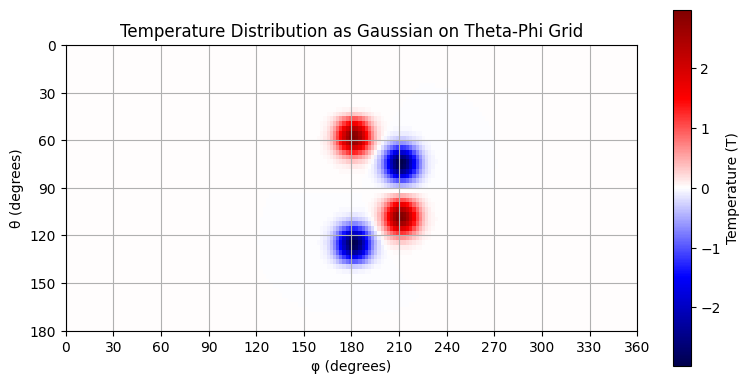

In [6]:
sigma_t = 5 * deg2rad
sigma_p = 7.07 * deg2rad 
T_plus_1 = 3*np.exp(-0.5*(((Theta - (9*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(6/6))/sigma_p)**2))
T_minus_1 = -3*np.exp(-0.5*(((Theta - (10.5*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(7/6))/sigma_p)**2))
T_plus_2 = 3*np.exp(-0.5*(((Theta - (13.5*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(7/6))/sigma_p)**2))
T_minus_2 = -3*np.exp(-0.5*(((Theta - (15*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(6/6))/sigma_p)**2))
T = T_plus_1 + T_minus_1 + T_plus_2 + T_minus_2
plt.figure(figsize=(8, 4))
plt.imshow(T, extent=(0, 360, 0, 180), aspect='equal', origin='lower', cmap='seismic')
plt.colorbar(label='Temperature (T)')
plt.xlabel("φ (degrees)")
plt.ylabel("θ (degrees)")
plt.gca().invert_yaxis()
plt.title("Temperature Distribution as Gaussian on Theta-Phi Grid")
plt.xticks(np.arange(0, 361, 30))
plt.yticks(np.arange(0, 181, 30))
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
N_phi, N_theta

(180, 60)

In [8]:
Phi.shape

(60, 180)

In [9]:
dtheta_rad = np.zeros(N_theta)
dtheta_rad[:len(theta_1n)] = dtheta1
dtheta_rad[len(theta_1n):len(theta_1n) + len(theta_2n)] = dtheta2
dtheta_rad[len(theta_1n) + len(theta_2n):len(theta_1n) + len(theta_2n) + len(theta_3)] = dtheta3
dtheta_rad[len(theta_1n) + len(theta_2n) + len(theta_3):len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s)] = dtheta2
dtheta_rad[len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s):] = dtheta1

In [10]:
dtheta_rad

array([0.10471976, 0.10471976, 0.10471976, 0.10471976, 0.10471976,
       0.05235988, 0.05235988, 0.05235988, 0.05235988, 0.05235988,
       0.05235988, 0.05235988, 0.05235988, 0.05235988, 0.05235988,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.05235988, 0.05235988, 0.05235988, 0.05235988, 0.05235988,
       0.05235988, 0.05235988, 0.05235988, 0.05235988, 0.05235988,
       0.10471976, 0.10471976, 0.10471976, 0.10471976, 0.10471976])

In [11]:
print(T.shape)
T = T.T
print(T.shape)

(60, 180)
(180, 60)


In [12]:
omega = omega_max - (2.3 * (np.cos(theta))**2 - 1.62* (np.cos(theta))**4) * deg2rad

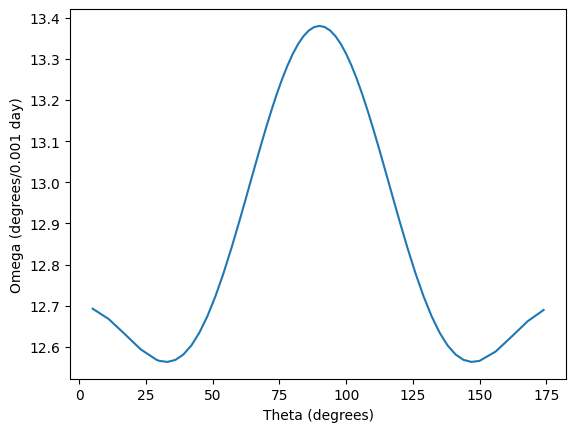

In [13]:
plt.plot(theta_deg, omega * rad2deg)
plt.xlabel("Theta (degrees)")
plt.ylabel(f"Omega (degrees/{dt} day)")
plt.show()

In [14]:
col = theta*rad2deg-90
v_mer = np.where(np.abs(col)<=75, v_mer_max * np.sin(np.pi * col / 75), 0)

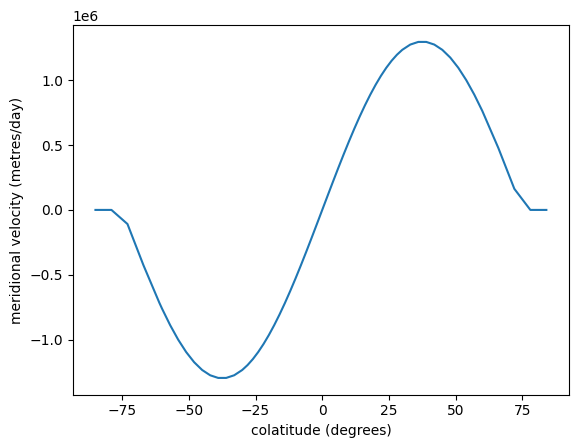

In [15]:
plt.plot(col, v_mer)
plt.xlabel("colatitude (degrees)")
plt.ylabel("meridional velocity (metres/day)")
plt.show()

In [16]:
cot = 1/np.tan(theta)
sin2 = (np.sin(theta))**2
senin = 1/(np.sin(theta))
cos = np.cos(theta)
sin = np.sin(theta)
all_values = np.zeros((N_save, N_phi, N_theta),dtype=np.float32)
all_values[0, :, :] = T
T_new = np.zeros_like(T)
T_new.shape

(180, 60)

In [17]:
accum_bottom = np.zeros(N_phi)
accum_top = np.zeros(N_phi)
save_idx = 0
all_values[save_idx, :, :]  = T
all_values[save_idx, :, 0]  = accum_bottom
all_values[save_idx, :, -1] = accum_top
save_idx += 1

In [18]:
C_phi_local = np.abs(omega) * dt / dphi
C_theta_local = np.abs(v_mer) * dt / (R * dtheta_rad)

print(f"Max C_phi = {np.max(C_phi_local):.4f}, Max C_theta = {np.max(C_theta_local):.4f}")

if np.max(C_phi_local) > 1.0 or np.max(C_theta_local) > 1.0:
    print("Warning: Local advection CFL > 1 — explicit scheme may become unstable.")


Max C_phi = 0.0067, Max C_theta = 0.0001


In [19]:
for n in range(1, N_steps + 1):
    i_sl = slice(1, -1)
    j_sl = slice(1, -1)

    Tc   = T[i_sl, j_sl]                 
    T_ip = T[2:,  j_sl]                  
    T_im = T[:-2, j_sl]                 
    T_jp = T[i_sl, 2:]                   
    T_jm = T[i_sl, :-2]                  

    dth     = dtheta_rad[1:-1]         
    inv_dth = 1.0 / dth
    inv_dth2= inv_dth**2
    sin_i   = sin[1:-1]
    sin2_i  = sin2[1:-1]
    cos_i   = cos[1:-1]
    cot_i   = cot[1:-1]
    sin_c    = sin[1:-1]                   
    sin_ph   = sin[2:]                      
    sin_mh   = sin[:-2]                    
    omg_c    = omega[1:-1]                  
    v_ph     = 0.5*(v_mer[1:-1] + v_mer[2:])  
    v_mh     = 0.5*(v_mer[:-2]  + v_mer[1:-1]) 

    eps = 1e-1
    sin_i_safe  = np.maximum(sin_i,  eps)
    sin2_i_safe = np.maximum(sin2_i, eps**2)
    cot_i_safe = np.maximum(cot_i, eps)
    d2T_dtheta = (T_jp - 2.0 * Tc + T_jm) * inv_dth2
    cot_term   = cot_i_safe * ((Tc - T_jm) * inv_dth)
    d2T_dphi   = (T_ip - 2.0 * Tc + T_im) / (dphi**2)

    diffusion = (alpha / (R**2)) * dt * (d2T_dtheta + cot_term + (d2T_dphi / sin2_i_safe))   #diffusion term

    div_phi = omg_c * (Tc - T_im) / dphi   #-omega(theta) * del(B)/del(phi)

    vph_pos = v_ph >= 0
    vmh_pos = v_mh >= 0

    T_up_ph = np.where(vph_pos, Tc, T_jp)  
    Fth_ph  = v_ph * T_up_ph                

    T_up_mh = np.where(vmh_pos, T_jm, Tc) 
    Fth_mh  = v_mh * T_up_mh

    div_theta = (sin_ph * Fth_ph - sin_mh * Fth_mh) / dth  
    div_theta = div_theta / (R * np.maximum(sin_c, 1e-8))   

    advection = -div_phi - div_theta

    T_new[i_sl, j_sl] = Tc + diffusion + dt * advection

    if np.any(np.isnan(T_new)) or np.any(np.isinf(T_new)):
        print(f"Numerical instability at step {n}")
        print(f"Max value in T_new: {np.nanmax(T_new)}, Min value: {np.nanmin(T_new)}")
        bad_indices = np.argwhere(~np.isfinite(T_new))
        print(f"Non-finite entries at indices (i,j): {bad_indices[:10]}")
        break

    T_new[0,   1:-1] = T_new[-2, 1:-1]
    T_new[-1,  1:-1] = T_new[1,  1:-1]

    accum_bottom += T_new[:, 1]
    accum_top    += T_new[:, -2]
    T_new[1:-1, 0]  = T_new[1:-1, 1]
    T_new[1:-1, -1] = T_new[1:-1, -2]
    T = T_new.copy()
    if (n % 100) == 0:
        all_values[save_idx, :, :]  = T
        all_values[save_idx, :, 0]  = accum_bottom
        all_values[save_idx, :, -1] = accum_top
        save_idx += 1

In [20]:
all_values = np.transpose(all_values, (0, 2, 1))

In [27]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
#vmin = np.min(all_values)
#vmax = np.max(all_values)
cax = ax.imshow(all_values[0], extent=[0, 360, 0, 180], aspect='equal', origin='lower', cmap='seismic', vmin=-5, vmax=5)
fig.colorbar(cax, label='Temperature')
ax.set_title('2D Heat Diffusion')
ax.set_ylabel('θ (degrees)')
ax.set_xlabel('φ (degrees)')
ax.set_xticks(np.arange(0, 361, 30))
ax.set_yticks(np.arange(0, 181, 15))
ax.grid(True)
ax.invert_yaxis()

def animate(frame):
    data = all_values[frame]
    ax.set_title(f'Magnetic field of a sunspot at t = {frame*dt*100:.2f} days')
    cax.set_data(data)
    return [cax]

ani = FuncAnimation(fig, animate, frames=range(0, all_values.shape[0], 100), interval=1000, blit=True, repeat=False)

plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [28]:
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=5)
ani.save('induction_equation_1_year.gif', writer=writer)